## 1. Introduction

Ebuss is a growing e-commerce platform selling products across multiple categories. The goal of this project is to build a **sentiment-based product recommendation system** that leverages users past reviews and ratings to improve product recommendations.

### Objectives
1. Perform sentiment analysis on user reviews 
2. Build ML classification models for sentiment prediction
3. Build and select a suitable recommendation system (user-based or item-based)
4. Integrate sentiment analysis with the recommendation system
5. Deploy the system as a web application

## 2. Dataset Overview

- Dataset size: 30,000 reviews
- Users: 20,000+
- Products: 200+
- Key columns:
  - `id`: Unique review ID
  - `brand`: Brand of the product
  - `categories`: Product categories
  - `manufacturer`: Manufacturer name
  - `name`: Product name
  - `reviews_date`: Date of review
  - `reviews_didPurchase`: Whether user purchased the product
  - `reviews_doRecommend`: Whether user recommends the product
  - `reviews_rating`: Rating given by the user (1–5)
  - `reviews_text`: Review text
  - `reviews_title`: Title of the review
  - `reviews_userCity`, `reviews_userProvince`: Location of the user
  - `reviews_username`: Unique user ID
  - `user_sentiment`: Overall sentiment (Positive / Negative)

In [29]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [30]:
# Load the dataset
df_raw = pd.read_csv('../data/sample30.csv')
df_raw.head()

,id,brand,categories,manufacturer,name,reviews_date,reviews_didPurchase,reviews_doRecommend,reviews_rating,reviews_text,reviews_title,reviews_userCity,reviews_userProvince,reviews_username,user_sentiment
0,AV13O1A8GV-KLJ3akUyj,Universal Music,"Movies, Music & Books,Music,R&b,Movies & TV,Mo...",Universal Music Group / Cash Money,Pink Friday: Roman Reloaded Re-Up (w/dvd),2012-11-30T06:21:45.000Z,NaN,NaN,5,i love this album. it's very good. more to the...,Just Awesome,Los Angeles,NaN,joshua,Positive
1,AV14LG0R-jtxr-f38QfS,Lundberg,"Food,Packaged Foods,Snacks,Crackers,Snacks, Co...",Lundberg,Lundberg Organic Cinnamon Toast Rice Cakes,2017-07-09T00:00:00.000Z,True,NaN,5,Good flavor. This review was collected as part...,Good,NaN,NaN,dorothy w,Positive
2,AV14LG0R-jtxr-f38QfS,Lundberg,"Food,Packaged Foods,Snacks,Crackers,Snacks, Co...",Lundberg,Lundberg Organic Cinnamon Toast Rice Cakes,2017-07-09T00:00:00.000Z,True,NaN,5,Good flavor.,Good,NaN,NaN,dorothy w,Positive
3,AV16khLE-jtxr-f38VFn,K-Y,"Personal Care,Medicine Cabinet,Lubricant/Sperm...",K-Y,K-Y Love Sensuality Pleasure Gel,2016-01-06T00:00:00.000Z,False,False,1,I read through the reviews on here before look...,Disappointed,NaN,NaN,rebecca,Negative
4,AV16khLE-jtxr-f38VFn,K-Y,"Personal Care,Medicine Cabinet,Lubricant/Sperm...",K-Y,K-Y Love Sensuality Pleasure Gel,2016-12-21T00:00:00.000Z,False,False,1,My husband bought this gel for us. The gel cau...,Irritation,NaN,NaN,walker557,Negative


## 3. Exploratory Data Analysis (EDA)

In [31]:
df_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   id                    30000 non-null  object
 1   brand                 30000 non-null  object
 2   categories            30000 non-null  object
 3   manufacturer          29859 non-null  object
 4   name                  30000 non-null  object
 5   reviews_date          29954 non-null  object
 6   reviews_didPurchase   15932 non-null  object
 7   reviews_doRecommend   27430 non-null  object
 8   reviews_rating        30000 non-null  int64 
 9   reviews_text          30000 non-null  object
 10  reviews_title         29810 non-null  object
 11  reviews_userCity      1929 non-null   object
 12  reviews_userProvince  170 non-null    object
 13  reviews_username      29937 non-null  object
 14  user_sentiment        29999 non-null  object
dtypes: int64(1), object(14)
memory usage

In [32]:
df_raw.shape

(30000, 15)

In [33]:
df_raw.isnull().sum().sort_values(ascending=False)

reviews_userProvince    29830
reviews_userCity        28071
reviews_didPurchase     14068
reviews_doRecommend      2570
reviews_title             190
manufacturer              141
reviews_username           63
reviews_date               46
user_sentiment              1
brand                       0
categories                  0
name                        0
id                          0
reviews_text                0
reviews_rating              0
dtype: int64

In [34]:
df = df_raw.copy()

In [35]:
df.drop(columns=['reviews_userProvince', 'reviews_userCity', 'reviews_didPurchase', 'reviews_doRecommend'])

df.shape

(30000, 15)

In [36]:
df = df.dropna(subset=['reviews_title', 'manufacturer', 'reviews_username', 'reviews_date', 'user_sentiment'])

df.shape

(29566, 15)

reviews_rating
5    20566
4     5933
1     1357
3     1309
2      401
Name: count, dtype: int64


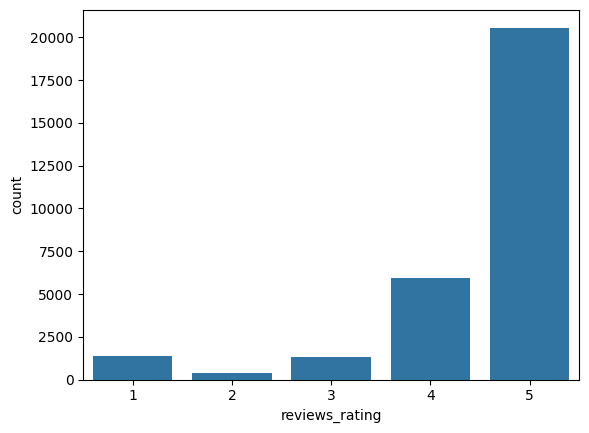

In [37]:
print(df["reviews_rating"].value_counts())

sns.countplot(data=df, x='reviews_rating')
plt.show()

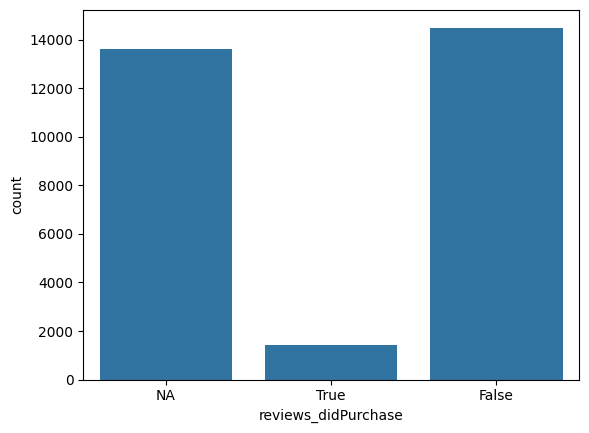

In [38]:
df['reviews_didPurchase'] = df['reviews_didPurchase'].fillna('NA')

sns.countplot(data=df, x='reviews_didPurchase')
plt.show()

In [39]:
import sys; sys.executable

'c:\\Users\\uvara\\AppData\\Local\\pypoetry\\Cache\\virtualenvs\\sentiment-based-product-recommendation-65kxRhs7-py3.12\\Scripts\\python.exe'

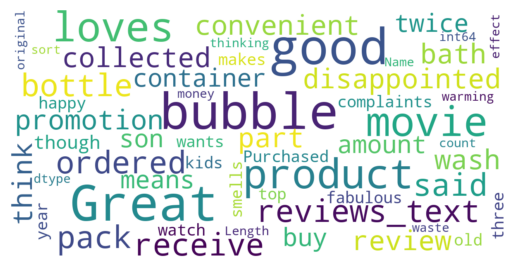

In [40]:
from wordcloud import WordCloud ,STOPWORDS
stopwords = set(STOPWORDS)

wordcloud = WordCloud(stopwords=stopwords, max_words=300, max_font_size=40, background_color='white',
                     scale=3, random_state=1).generate(str(df['reviews_text'].value_counts()))

plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [41]:
df['user_sentiment'] = df['user_sentiment'].map({'Positive':1,'Negative':0})

In [49]:
count1 = df[(df["user_sentiment"]==0) & (df["reviews_rating"]>=4)][["reviews_title","reviews_text", "reviews_rating"]].shape[0]
count2 = df[(df["user_sentiment"]==1) & (df["reviews_rating"]<4)][["reviews_title","reviews_text", "reviews_rating"]].shape[0]

print("user sentiment = 0 & rating >= 4:", count1)
print("user sentiment = 1 & rating < 4:", count2)

user sentiment = 0 & rating >= 4: 2374
user sentiment = 1 & rating < 4: 2137


In [50]:
pd.crosstab(df["user_sentiment"], df["reviews_rating"], margins=True)

reviews_rating,1,2,3,4,5,All
user_sentiment,,,,,,
0,582,135,213,535,1839,3304
1,775,266,1096,5398,18727,26262
All,1357,401,1309,5933,20566,29566


The matrix shows a clear mismatch between user_sentiment and reviews_rating. Several reviews marked as negative sentiment (0) still have high ratings (4 or 5), while some positive sentiment (1) reviews have low ratings (1 or 2). This indicates that ratings alone do not reliably reflect the sentiment expressed in review text, reinforcing the need for a dedicated sentiment analysis model instead of relying only on ratings.

In [51]:
def derive_user_sentiment(x):
    return 1 if x >= 4 else 0

In [52]:
df['user_sentiment'] = df['reviews_rating'].apply(derive_user_sentiment)

In [53]:
pd.crosstab(df["user_sentiment"], df["reviews_rating"], margins=True)

reviews_rating,1,2,3,4,5,All
user_sentiment,,,,,,
0,1357,401,1309,0,0,3067
1,0,0,0,5933,20566,26499
All,1357,401,1309,5933,20566,29566


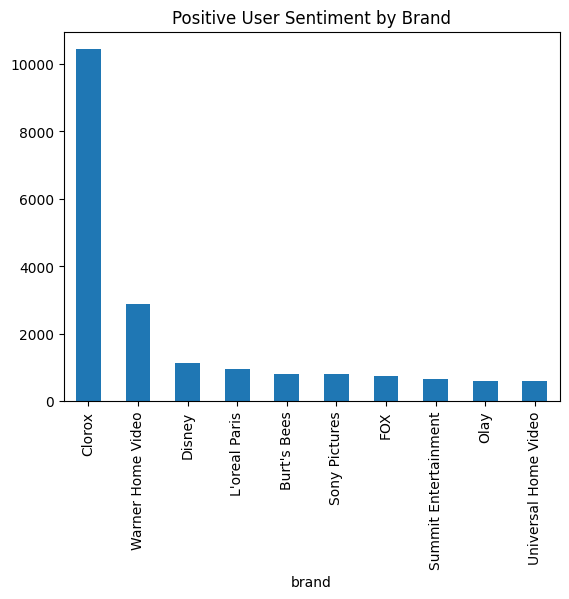

In [61]:
ax = df[df['user_sentiment'] == 1]['brand'].value_counts().head(10).plot(kind='bar')
plt.title('Positive User Sentiment by Brand')
plt.show()

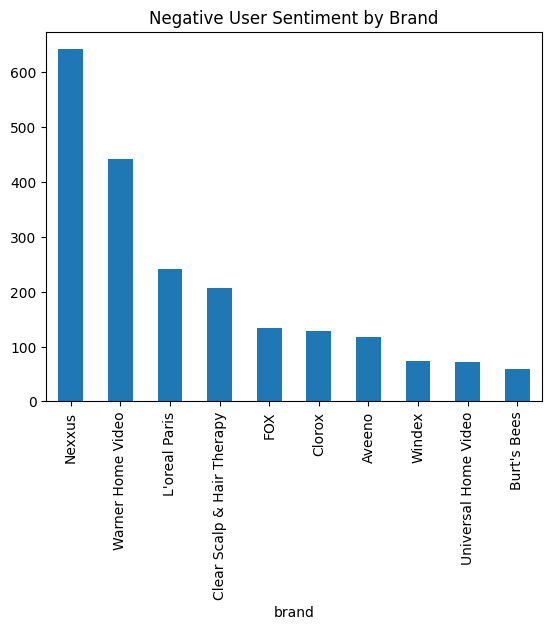

In [62]:
ax = df[df['user_sentiment'] == 0]['brand'].value_counts().head(10).plot(kind='bar')
plt.title('Negative User Sentiment by Brand')
plt.show()